<a href="https://colab.research.google.com/github/MADDIPATIGOWTHAM/FML/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
data=pd.read_csv('titanic.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
y=data['Survived'].values

In [8]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [9]:
data=data.drop('PassengerId',axis=1)

In [10]:
data=data.drop('Survived',axis=1)

In [11]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data=data.drop('Name',axis=1)

In [13]:
data=data.drop('SibSp',axis=1)
data=data.drop('Parch',axis=1)
data=data.drop('Ticket',axis=1)
data=data.drop('Fare',axis=1)
data=data.drop('Cabin',axis=1)
data=data.drop('Embarked',axis=1)

In [14]:
data

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [15]:
from sklearn.preprocessing import StandardScaler
data.fillna(29,inplace=True)

In [16]:
data

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,29.0
889,1,male,26.0


In [17]:
data

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,29.0
889,1,male,26.0


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data['Sex'].unique())
data['Sex']=le.transform(data['Sex'])

In [19]:
data.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [20]:
data

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,29.0
889,1,1,26.0


In [21]:
x=data.values
x

array([[ 3.,  1., 22.],
       [ 1.,  0., 38.],
       [ 3.,  0., 26.],
       ...,
       [ 3.,  0., 29.],
       [ 1.,  1., 26.],
       [ 3.,  1., 32.]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.4, random_state=0)

In [23]:
model = LogisticRegression(C=0.05, multi_class='ovr',random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0)

In [24]:
model.classes_

array([0, 1])

In [27]:
model.intercept_

array([2.80183401])

In [28]:
model.coef_

array([[-0.75968857, -1.32716932, -0.02529216]])

In [30]:
model.predict_proba(x)

array([[0.79589434, 0.20410566],
       [0.25330864, 0.74669136],
       [0.53365602, 0.46634398],
       ...,
       [0.55248208, 0.44751792],
       [0.48565896, 0.51434104],
       [0.83393141, 0.16606859]])

In [40]:
import matplotlib.pyplot  as plt


In [54]:
y_pred = model.predict(X_train)
print(y_pred)
     

[0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 

In [61]:
y_train=y_train.reshape(-1,1)

In [55]:
y_pred=y_pred.reshape(-1,1)

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

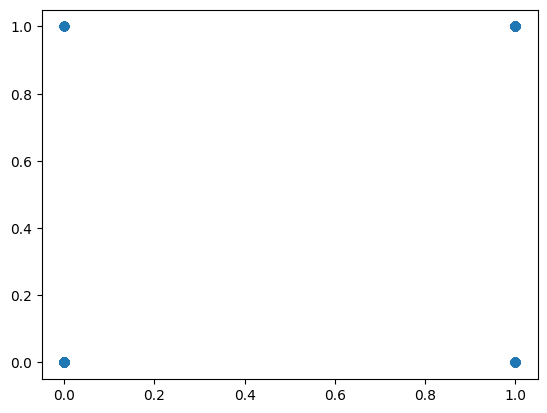

In [62]:
plt.scatter(y_train,y_pred)

In [59]:
y_train

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [63]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,

In [67]:
confusion_matrix(y_train, y_pred)

array([[302,  26],
       [ 86, 120]])

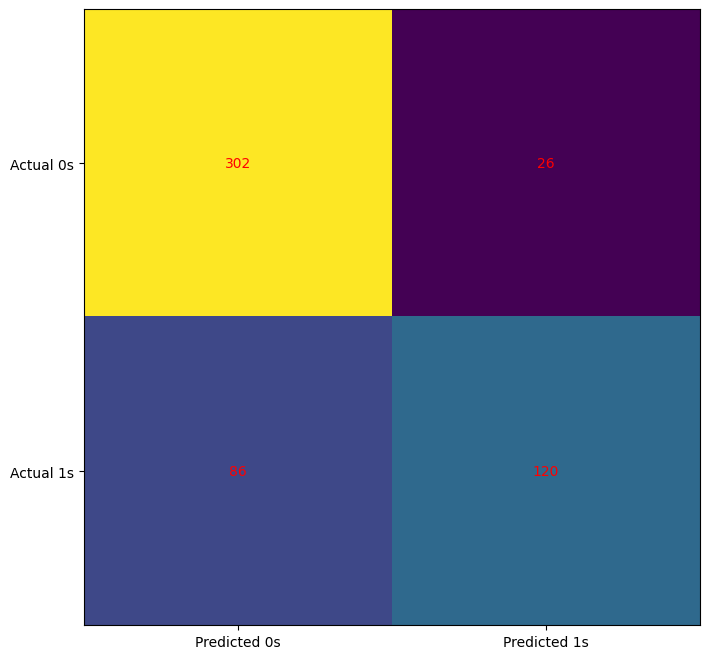

In [68]:
#visualization of confusion matrix
cm = confusion_matrix(y_train, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [71]:
y_2pred=model.predict(X_test)

In [73]:
confusion_matrix(y_test, y_2pred)

array([[206,  15],
       [ 60,  76]])

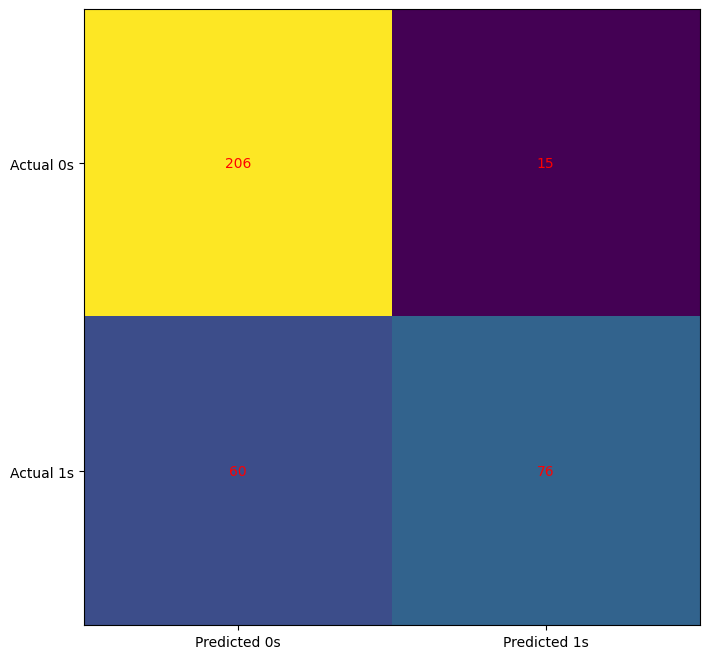

In [74]:
#visualization of confusion matrix
cm = confusion_matrix(y_test, y_2pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [75]:
print(classification_report(y_test, y_2pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85       221
           1       0.84      0.56      0.67       136

    accuracy                           0.79       357
   macro avg       0.80      0.75      0.76       357
weighted avg       0.80      0.79      0.78       357



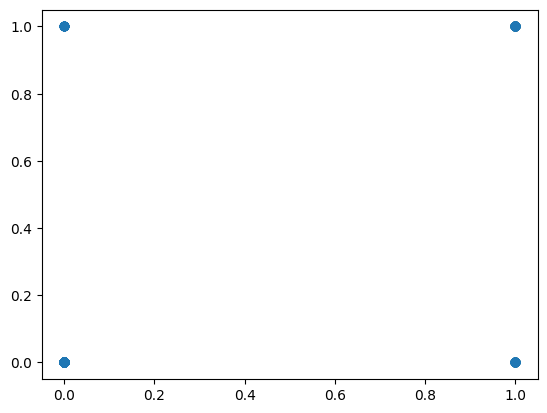

In [80]:
plt.scatter(y_test,y_2pred)

In [78]:
y_test=y_test.reshape(-1,1)

In [79]:
y_2ped=y_2pred.reshape(-1,1)

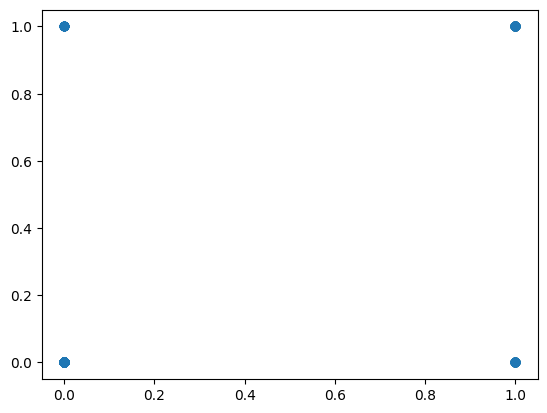

In [81]:
plt.scatter(y_test,y_2pred)

In [64]:
model.score(X_test,y_test)

0.7899159663865546

In [70]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       328
           1       0.82      0.58      0.68       206

    accuracy                           0.79       534
   macro avg       0.80      0.75      0.76       534
weighted avg       0.80      0.79      0.78       534

